[![Open In colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/APIs/2_APIs_Series_Tiempo/clase-2.ipynb)

# Clase 2: APIs de Series de Tiempo 

Esta clase presume un conocimiento basico de lo que es una API rest, del uso de la libreria `requests` y de `pandas`. Para una breve introduccion a APIs REST se recomienda revisar primero la [clase 1 de APIs](https://github.com/institutohumai/cursos-python/tree/master/APIs/1_APIs_Geograficas).

In [1]:
import requests
import pandas as pd

# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# establece un alto y ancho default para todos los graficos
plt.rcParams['figure.figsize'] = (12, 8)

## Series de tiempo

Las series de tiempo son datos estructurados en forma tal que existe una **variable numérica que evoluciona en el tiempo, a intervalos regulares**.

El PBI, la inflación, las exportaciones, la temperatura, la cantidad de llamadas a un call center... son todas variables que se pueden tratar como series de tiempo. Lo distintivo de esta estructura de datos es que tiene una sola dimension de apertura que configura su indice o clave primaria (aquella que permite devolver una sola fila de la tabla): **el tiempo**.

## API Series de Tiempo

La **[API Series de Tiempo de la Republica Argentina](https://apis.datos.gob.ar/series)** es una API REST desarrollada y mantenida por el Estado Nacional de Argentina para la consulta de estadisticas en formato de series de tiempo. Contiene mas de 25 mil series publicadas por mas de 10 organismos publicos, tanto de series historicas como actualizadas.

La API permite:

* [Buscar series](https://datosgobar.github.io/series-tiempo-ar-api/reference/search-reference/) por texto. Tambien se pueden buscar en el sitio web de datos.gob.ar: https://datos.gob.ar/series
* Cambiar la frecuencia (por ejemplo: convertir series diarias en mensuales)
* Elegir la funcion de agregacion de valores, usada en el cambio de frecuencia (una serie se puede convertir de diaria a mensual promediando, sumando, sacando el maximo, el minimo, el ultimo valor del periodo, etc).
* Filtrar por rango de fechas
* Elegir el formato (CSV o JSON)
* Cambiar configuracion del CSV (caracter separador, caracter decimal)

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional en Argentina y usar el link al CSV para leerlos directamente desde python con pandas.

Tambien podes **buscar los ids de las series de interes** y juntarlos en la misma consulta para armar una tabla de hasta 40 series.

En esta clase vamos a ver como se usa, y algunos ejemplos de cosas utiles que podes hacer con ella en python.

### Parametros del recurso `/series` 

La llamada a la API de series tiene la misma estructura que el sitio web de busqueda y consulta. El unico parametro obligatorio es `ids`, que debe contener los ids de 1 o mas series separados con comas.

Por ejemplo: 

* URL web: https://datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27 Desde esta UI web podés copiar la URL a un archivo CSV o JSON que tiene la evolución del precio de la papa y de la picada común 
* URL API en CSV: https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=csv
* URL API en JSON: https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=json

Como podes ver, la URL es practicamente igual agregando `apis` al principio, y especificando el formato en el que se desea la respuesta.

En pandas podes leer directamente la URL en CSV.

In [2]:
df = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=csv")

In [3]:
df.tail()

,indice_tiempo,ipc_2016_papa,ipc_2016_carne_picada_comun
46,2020-02-01,33.23,209.42
47,2020-03-01,32.84,214.88
48,2020-04-01,36.65,227.42
49,2020-05-01,34.58,229.53
50,2020-06-01,33.85,230.34


<AxesSubplot:>

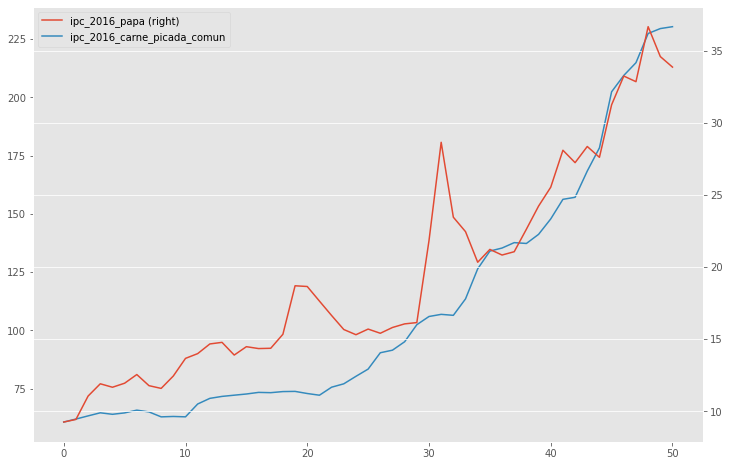

In [4]:
df.plot(secondary_y="ipc_2016_papa")

#### Frecuencia (`collapse` y `collapse_aggregation`)

La API automaticamente elige la frecuencia de mayor desagregacion temporal posible (la frecuencia mas alta), dadas las series solicitadas. Si en la misma llamada se solicita una serie diaria y una mensual, la mayor frecuencia posible es mensual.

Vamos a guardar la base de la llamada a la API para facilitar las cosas. Para estos ejemplos, siempre vamos a querer usar `format=csv` y `last=5000` (la API no devuelve *todos* los valores disponibles por default, `limit` permite elegir hasta los primeros 5000 valores y `last` permite elegir hasta los ultimos 5000 valores).

In [5]:
BASE_API = 'https://apis.datos.gob.ar/series/api/series/?format=csv&last=5000'

**Tipo de cambio del Banco Nacion (canal electronico, venta, valor de cierre a las 15hs)**. Serie diaria.

https://datos.gob.ar/series/api/series/?ids=tc_usd_bna_ev15

In [6]:
tc_bna_id = "tc_usd_bna_ev15"
tc_bna_api = f"{BASE_API}&ids={tc_bna_id}"

**Nota**: si no lo usaste antes, desde la version 3.7 de python se pueden pasar variables directamente en un string de python usando la `f` al principio y los `{}` para separar lo que es codigo, de lo que es texto.

<AxesSubplot:>

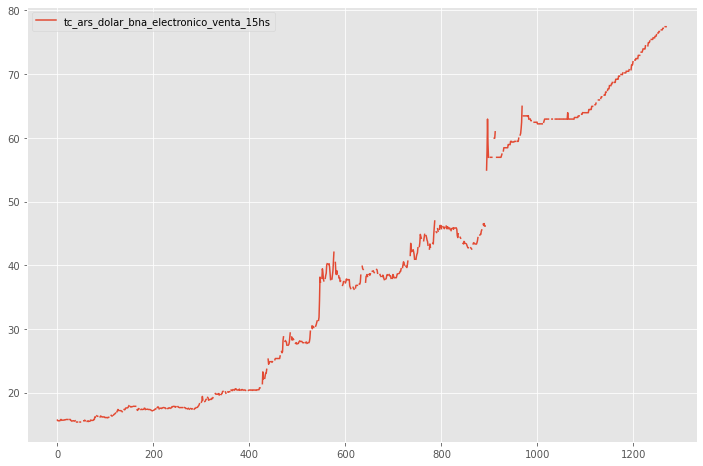

In [7]:
pd.read_csv(tc_bna_api).plot()

Podemos adivinar que la seri

**Precio del kilo de picada comun**. Serie mensual.

https://datos.gob.ar/series/api/series/?ids=105.1_I2CPC_2016_M_27

In [8]:
picada_id = "105.1_I2CPC_2016_M_27"
picada_api = f"{BASE_API}&ids={picada_id}"

/home/abenassi/anaconda3/envs/ihumai/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='indice_tiempo'>

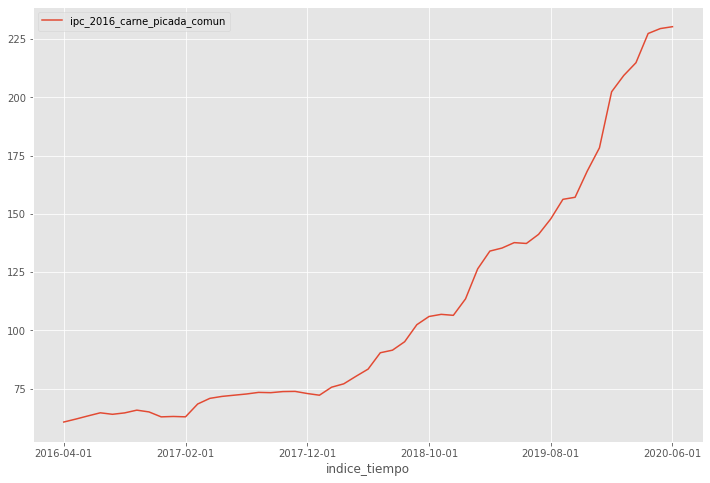

In [9]:
pd.read_csv(picada_api).set_index('indice_tiempo').plot()

Ahora tratemos de juntar las dos series en la misma llamada, y veamos que pasa.

In [10]:
tc_picada_api = f"{BASE_API}&ids={tc_bna_id},{picada_id}"

/home/abenassi/anaconda3/envs/ihumai/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='indice_tiempo'>

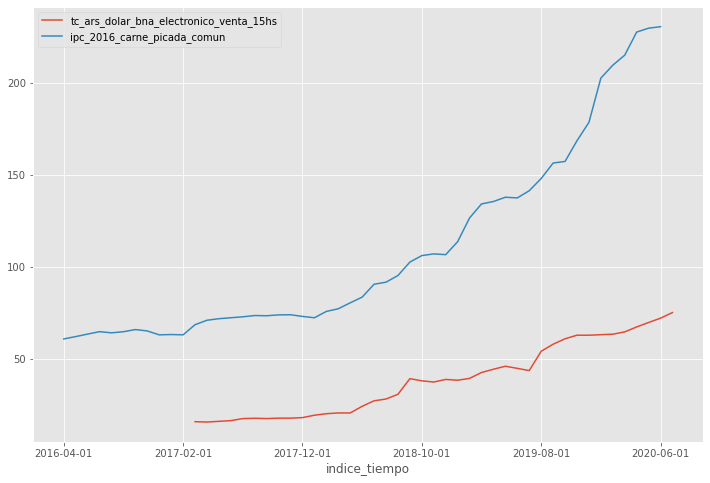

In [11]:
pd.read_csv(tc_picada_api).set_index('indice_tiempo').plot()

La API convirtio la serie de tipo de cambio en **mensual** y aplico un **promedio**, para poder tener las dos series en la misma tabla.

El parametro `collapse` aplicado a esta consulta nos permite ir hacia frecuencias mas bajas, pero nunca mas altas. Las frecuencias disponibles son:

* `year`: Muestra datos agregados anualmente.
* `semester`: Muestra datos agregados semestralmente.
* `quarter`: Muestra datos agregados trimestralmente.
* `month`: Muestra datos agregados mensualmente.
* `week`: Muestra datos agregados semanalmente.
* `day`: Muestra datos agregados diariamente.

In [12]:
tc_picada_q_api = f"{BASE_API}&ids={tc_bna_id},{picada_id}&collapse=quarter"

<AxesSubplot:xlabel='indice_tiempo'>

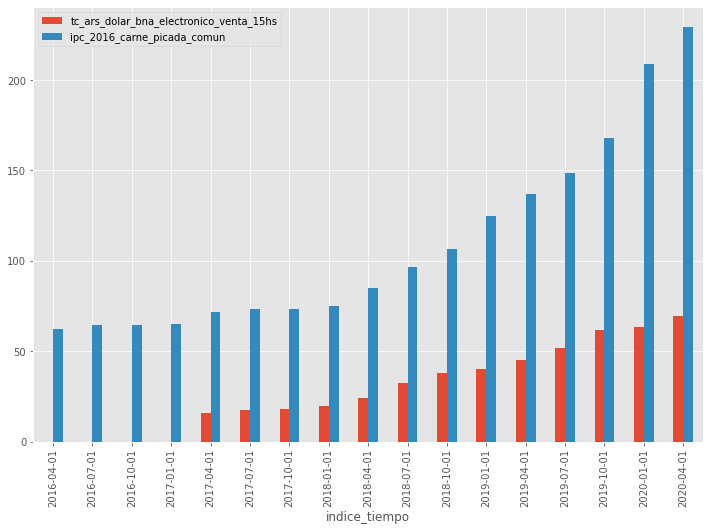

In [13]:
pd.read_csv(tc_picada_q_api).set_index('indice_tiempo').plot(kind='bar')

Tambien podemos cambiar la funcion que se usa para agregar datos temporalmente, con `collapse_aggregation`. Las funciones disponibles son:

* `avg`: Realiza el promedio de todos los valores agrupados. Es la opción por defecto si no se indica valor para collapse_aggregation.
* `sum`: Suma todos los valores agrupados.
* `end_of_period`: Último valor del período.
* `min`: Mínimo entre los valores agrupados.
* `max`: Máximo entre los valores agrupados.

In [19]:
tc_bna_api = f"{BASE_API}&ids={tc_bna_id}&collapse=month&collapse_aggregation=end_of_period"

/home/abenassi/anaconda3/envs/ihumai/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='indice_tiempo'>

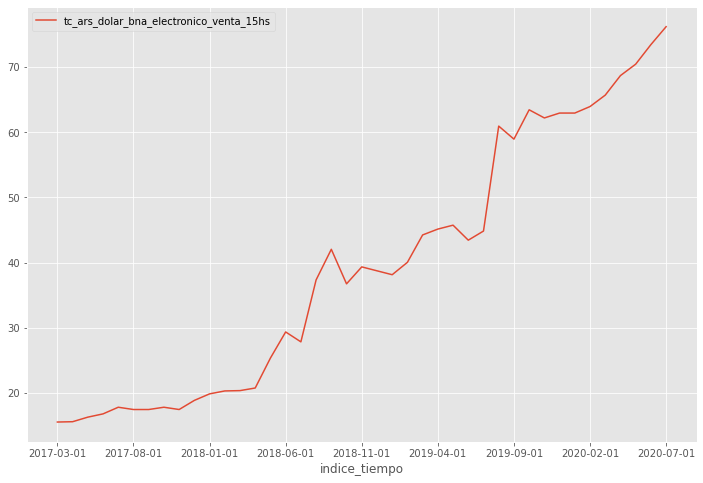

In [20]:
pd.read_csv(tc_bna_api).set_index('indice_tiempo').plot()

Ese grafico muestra los valores de cierre de cada mes, para el tipo de cambio del Banco Nacion. Pero commo hacemos para tener en un mismo grafico los minimos, maximos y promedios mensuales del tipo de cambio?

El parametro `collapse_aggregation` se puede usar en forma individual para cada serie, y las series se pueden repetir en la misma llamada.

In [21]:
tc_bna_api = f"{BASE_API}&ids={tc_bna_id}:min,{tc_bna_id}:avg,{tc_bna_id}:max&collapse=month"

/home/abenassi/anaconda3/envs/ihumai/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='indice_tiempo'>

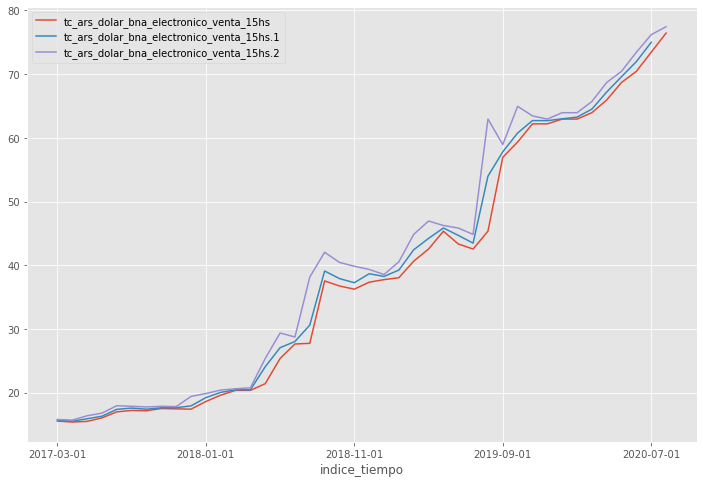

In [23]:
pd.read_csv(tc_bna_api).set_index('indice_tiempo').plot()

En este caso probablemente convenga cambiar los nombres de las columnas, hacia algo un poco mas claro.

In [35]:
df_tc_bna = pd.read_csv(
    tc_bna_api, 
    # elige nombres nuevos para las columnas
    names=['indice_tiempo', 'minimo', 'promedio', 'maximo'],
    # saltea la primer fila, que contiene los otros nombres
    skiprows=1,
).set_index('indice_tiempo')

/home/abenassi/anaconda3/envs/ihumai/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'Tipo de cambio diario Banco Nacion (mensual)'}, xlabel='indice_tiempo'>

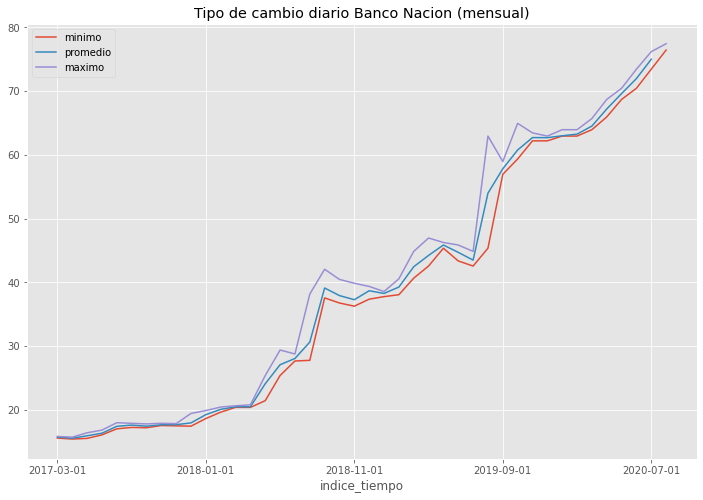

In [36]:
df_tc_bna.plot(
    title="Tipo de cambio diario Banco Nacion (mensual)"
)

**Ejercicio:** realiza un grafico similar al del tipo de cambio, con las temperaturas diarias minimas, maximas y promedio por mes. Podes usar alguna de las [series del Servicio Meteorologico Nacional](https://datos.gob.ar/series/api/search/?offset=0&limit=10&catalog_id=smn) para esto. La estacion de Aeroparque sirve como referencia de las temperaturas en la Ciudad de Buenos Aires.

#### Modo de representacion (`representation_mode`) 

El parametro `representation_mode` permite aplicar transformaciones a las series. Funciona en forma muy similar al `collapse_aggregation` y tambien se puede aplicar a series individuales usando dos puntos.

Los modos de representación disponibles son:

* `value`: Es el modo de representación por defecto. Devuelve el valor medido en la serie.
* `change`: Devuelve la diferencia absoluta entre el valor del período t y el de t-1.
* `change_a_year_ago`: Devuelve la diferencia absoluta entre el valor del período t y el valor del periodo t, del año anterior.
* `change_since_beginning_of_year`: Devuelve la diferencia absoluta entre el valor del período t y el valor del 1 de enero del año al que pertenece t.
* `percent_change`: Devuelve la variación porcentual entre el valor del período t y el de t-1.
* `percent_change_a_year_ago`: Devuelve la variación porcentual entre el valor del período t y el del período t equivalente de hace un año atrás.
* `percent_change_since_beginning_of_year`: Devuelve la variación porcentual entre el valor del período t y el valor del 1 de enero del año al que pertenece t.

Esto nos podria servir, por ejemplo, para comparar el ritmo de aumento de la carne picada comun con el del nivel general de precios de la economia.

Sin embargo aca conviene no usar el parametro `last`, para tener los calculos hasta los valores mas actualizados (este parametro no funciona bien en combinacion con `representation_mode`).

In [54]:
BASE_API = 'https://apis.datos.gob.ar/series/api/series/?format=csv&limit=5000'

In [55]:
ipc_id = '148.3_INIVELNAL_DICI_M_26'
inflacion_picada_api = f"{BASE_API}&ids={picada_id},{ipc_id}&representation_mode=percent_change_a_year_ago"

<AxesSubplot:xlabel='indice_tiempo'>

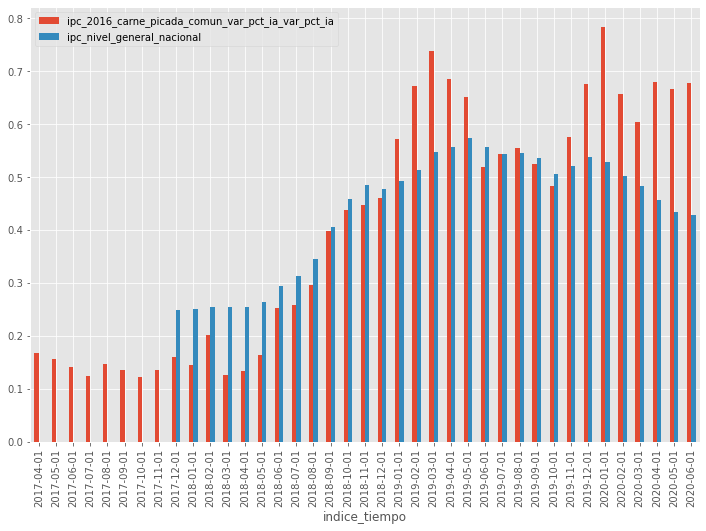

In [56]:
pd.read_csv(inflacion_picada_api).set_index('indice_tiempo').plot(kind='bar')

**Ejercicio:** hacer un grafico donde se compare el ritmo de crecimiento interanual de los precios de 3 productos diferentes. Podes buscar los ids en la distribucion de [precios de referencia del IPC GBA](https://datos.gob.ar/dataset/sspm-indice-precios-al-consumidor-nacional-ipc-base-diciembre-2016/archivo/sspm_145.13).

**Ejercicio:** hacer una tabla (un dataframe) con las variaciones porcentuales mensuales e interanuales del IPC general de las distintas regiones del pais. Podes buscar los ids [en esta distribucion](https://datos.gob.ar/dataset/sspm-indice-precios-al-consumidor-nacional-ipc-base-diciembre-2016/archivo/sspm_145.9).

#### Filtros por fechas (`start_date` y `end_date`) 

### Ejemplo de uso 1: analisis de correlacion con el EMAE

https://github.com/abenassi/analisis-datos-python/blob/master/series-tiempo.ipynb

### Ejemplo de uso 2: informe de precios por mail

https://github.com/datosgobar/taller-series-tiempo-mediaparty-2018/blob/master/2A-python.ipynb

## API FRED 

## API Quandl 

## API Banco Mundial 